In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read CSV
apple = pd.read_csv('AAPL.csv')

In [3]:
# Display head and tail of data
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,141.479996,141.880005,140.869995,141.830002,135.750275,16582100
1,2017-04-18,141.410004,142.039993,141.110001,141.199997,135.147308,14697500
2,2017-04-19,141.880005,142.000000,140.449997,140.679993,134.649567,17328400
3,2017-04-20,141.220001,142.919998,141.160004,142.440002,136.334137,23319600
4,2017-04-21,142.440002,142.679993,141.850006,142.270004,136.171432,17320900


In [4]:
apple.set_index('Date');

In [5]:
# Convert Date column to datetime
apple['Date'] = pd.to_datetime(apple['Date'])

In [6]:
# Display the data type for each column
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
#apple.index = pd.to_datetime(apple.Date)

In [8]:
# Round the decimals
apple.round(2);

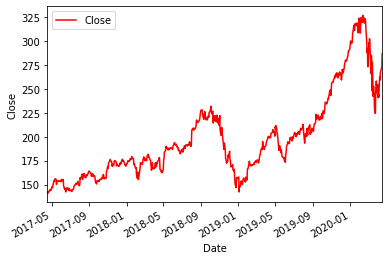

In [9]:
# Plot time series
apple.plot(kind='line', x='Date', y='Close', color='red')

# Specify x-axis label
plt.xlabel('Date')

# Specify y-axis label
plt.ylabel('Close')

# Show plot
plt.show()

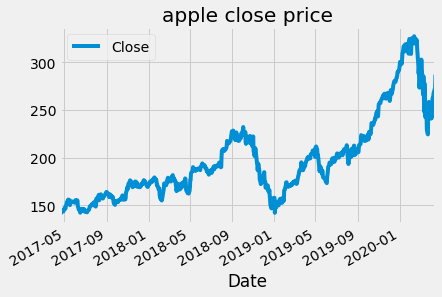

In [10]:
# Specify the plot styles
plt.style.use('fivethirtyeight')

# Plot apple
apple.plot(kind='line', x='Date', y='Close')

plt.title('apple close price')
plt.show()

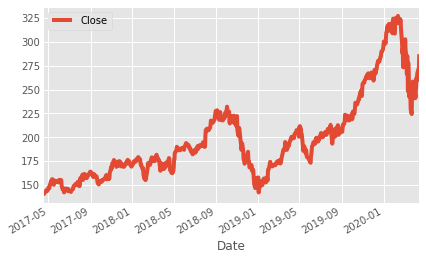

In [11]:
plt.style.use('ggplot')

apple.plot(kind='line', x='Date', y='Close')

plt.show();

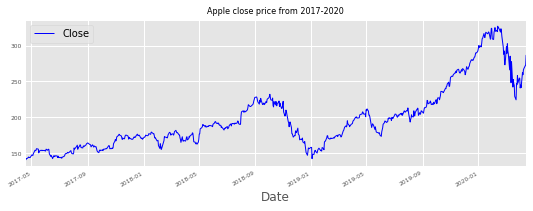

In [12]:
apple.plot(color='blue', x='Date', y='Close', figsize=(8,3), linewidth=1, fontsize=6)

plt.title('Apple close price from 2017-2020', fontsize=8)

plt.show();

In [13]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

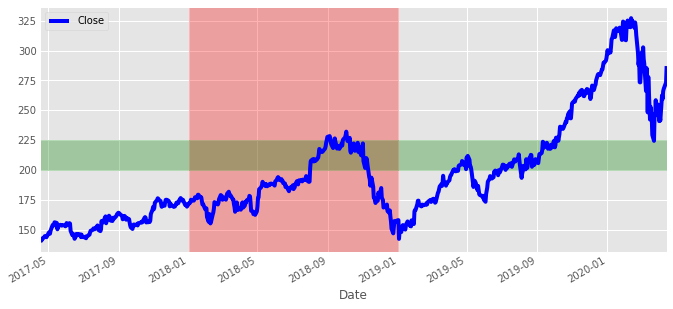

In [14]:
# Plot your apple time series
ax = apple.plot(x='Date', y='Close', figsize=(10,5), color='blue', fontsize=10)

# Add a vertical red shaded region
ax.axvspan('2018-01-01', '2019-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(225,200,  color='green', alpha=0.3)

plt.show()

In [15]:
# Find missing values
print(apple.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [16]:
# No missing values but here's how you fill missing values

# apple = apple.fillna(method='ffill')

# The argument specifies the type of method you want to use
# bfill(backfilling) = ensuring that missing values are replaced using the NEXT valid observatiion
# ffill(forward-filling) = ensuring that missing values are replaced using the LAST valid observation

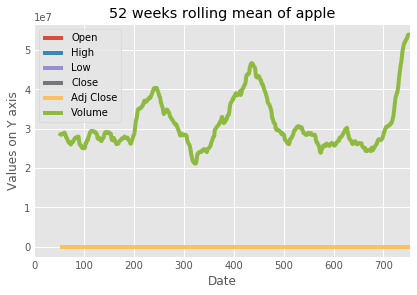

In [17]:
# Plotting aggregates of data
apple_mean = apple.rolling(window=52).mean()

ax = apple_mean.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Values on Y axis')
ax.set_title('52 weeks rolling mean of apple')

plt.show()

In [18]:
# Now you see how I completely botched this one? Cool

In [19]:
df = pd.read_csv('AAPL.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,141.479996,141.880005,140.869995,141.830002,135.750275,16582100
1,2017-04-18,141.410004,142.039993,141.110001,141.199997,135.147308,14697500
2,2017-04-19,141.880005,142.000000,140.449997,140.679993,134.649567,17328400
3,2017-04-20,141.220001,142.919998,141.160004,142.440002,136.334137,23319600
4,2017-04-21,142.440002,142.679993,141.850006,142.270004,136.171432,17320900


In [20]:
df1 = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [21]:
df1.dtypes

Date      object
Close    float64
dtype: object

In [22]:
# Bet 
df1['Date'] = pd.to_datetime(df1['Date'])

In [23]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [24]:
# Round the decimals
df1 = df1.round(2)

In [25]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [26]:
df1.set_index('Date', inplace=True)

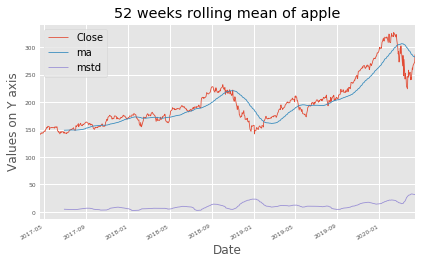

In [27]:
df1['ma'] = df1['Close'].rolling(window=52).mean()
df1['mstd'] = df1['Close'].rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
#df1['upper'] = df1['ma'] + (df1['mstd'] * 2)

# Add the lower bound column to the ma DataFrame
#df1['lower'] = df1['ma'] - (df1['mstd'] * 2)


ax = df1.plot(linewidth=0.8, fontsize=6)
ax.set_xlabel('Date')
ax.set_ylabel('Values on Y axis')
ax.set_title('52 weeks rolling mean of apple')

plt.show();

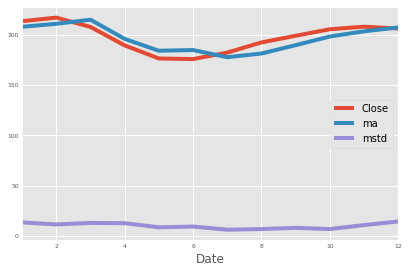

In [28]:
# Get month for each dates in the index of co2_levels
index_month = df1.index.month

# Compute the mean CO2 levels for each month of the year
mean_df1_by_month = df1.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_df1_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

# Summarizing the values in time series data

* what is the average value of your data?
* what is the maximum value observed?

In [29]:
# Pandas describe() method automatically computes key statistics of all numeric columns in your DF
df1.describe()

,Close,ma,mstd
count,754.000000,703.000000,703.000000
mean,197.413223,196.665721,10.351494
std,43.546741,40.069683,6.019550
min,140.680000,148.871346,2.514490
25%,166.762500,170.527019,5.952745
50%,186.835000,188.626731,9.231447
75%,217.640000,211.249519,12.660295
max,327.200000,306.726731,32.679979


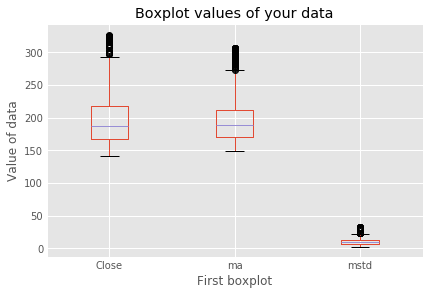

In [30]:
# Using a box plot provides information on the shape, variability, and median of your data
# It's particularly useful to display range of data, and identifying potential outliers
ax1 = df1.boxplot()
ax1.set_xlabel('First boxplot')
ax1.set_ylabel('Value of data')
ax1.set_title('Boxplot values of your data')

plt.show()

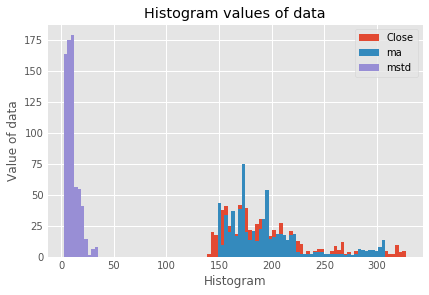

In [31]:
# Using a histogram allows you to inspect the underlying distribution of data
ax2 = df1.plot(kind='hist', bins=100)
ax2.set_xlabel('Histogram')
ax2.set_ylabel('Value of data')
ax2.set_title('Histogram values of data')

plt.show()

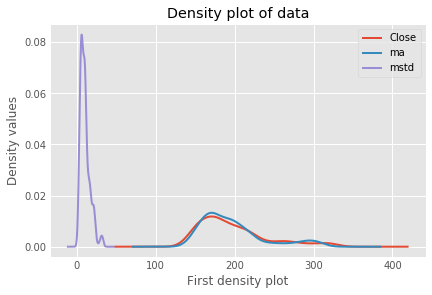

In [32]:
# Using a density plot
ax3 = df1.plot(kind='density', linewidth=2)
ax3.set_xlabel('First density plot')
ax3.set_ylabel('Density values')
ax3.set_title('Density plot of data')

plt.show()

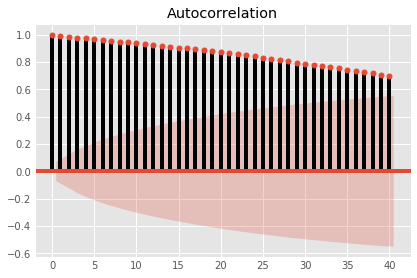

In [33]:
# Plotting autocorrelations 
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(df1['Close'], lags=40)

plt.show()

### Interpreting autocorrelation plots
* If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

* n order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant

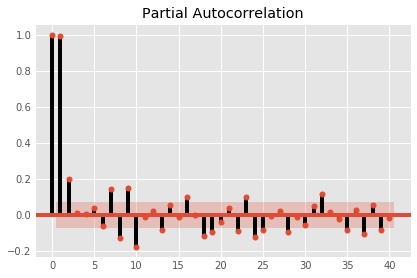

In [34]:
# Plotting partial autocorrelations
# Partial autocorrelation removes the effect of previous time points
# The red shaded regions show that the observed partial autocorrelation values are statistically significant
fig = tsaplots.plot_pacf(df1['Close'], lags=40)

plt.show()

### Interpreting partial autocorrelation plots

* If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series

* The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

## Seasonality, trend and noise
#### The properties of time series

* Seasonality: does the data display a clear periodic pattern?
* Trend: does the data follow a consistent upwards or downwards slope?
* Noise: are there any outlier points or missing values that are not consistent with the rest of the data?, noise describes the unexplained variance and volatility of your time series

In [38]:
# Time series decomposition
# this will allow you to automatically extract and quantify the structure of time-series data
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 11, 9
decompoisition = sm.tsa.seasonal_decompose(
    df1['Close'])
fig = decomposition.plot()

plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [40]:
df1.dtypes

Close    float64
ma       float64
mstd     float64
dtype: object

In [ ]:
df1['close'] = df1['Close']